# Linear regression with sklearn

## Import the relevant libraries

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

## Load the data

In [87]:
data = pd.read_csv('1.01. Simple linear regression.csv')
data.head(10)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
5,1670,2.91
6,1764,3.00
7,1764,3.00
8,1792,3.01
9,1850,3.01


### Declare the dependent and independent variables

In [88]:
x = data['SAT']
y = data['GPA']

In [89]:
x.shape

(84,)

In [90]:
y.shape

(84,)

In [91]:
# It should be a 2D array (a matrix)
# x_matrix = x.values.reshape(84,1) equal to (-1,1)
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

In [92]:
y_matrix = y.values.reshape(-1,1)
y_matrix.shape

(84, 1)

In [93]:
linreg = LinearRegression()
linreg

LinearRegression()

In [94]:
# The first argument is the independent variable, while the second - the dependent (unlike with StatsModels)
# Remember in Statsmodels we had to manually add a constant. 
linreg.fit(x_matrix,y_matrix)

LinearRegression()

In [95]:
# R-Squared value is the same as the R-Squared in the StatsModels
linreg.score(x_matrix,y_matrix) 

0.40600391479679754

In [96]:
# coefficient for SAT
linreg.coef_

array([[0.00165569]])

In [97]:
# coefficient of intercept
linreg.intercept_

array([0.2750403])

In [98]:
# predict for SAT = 1740 and SAT = 1760  and put them into dataframe
new_data = pd.DataFrame(data=[1740,1760],columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [99]:
linreg.predict(new_data)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[3.15593751],
       [3.18905127]])

In [100]:
new_data['Predicted_GPA'] = linreg.predict(new_data)
new_data

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


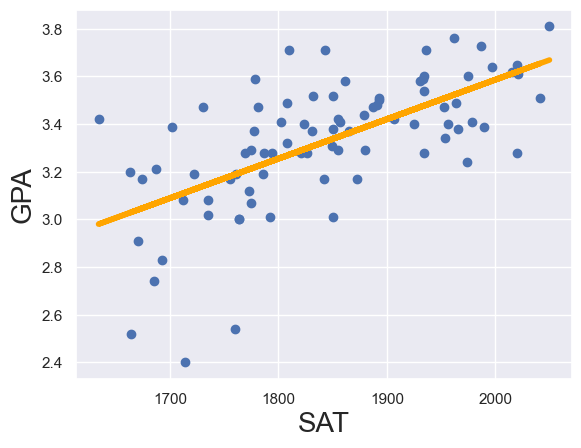

In [101]:
# we plot the data
plt.scatter(x,y)

# Parametrized version of the regression line
yhat = linreg.coef_*x_matrix + linreg.intercept_

# Plotting the regression line
fig = plt.plot(x,yhat, lw=4, c='orange', label ='regression line')

# Labelling our axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()